In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import missingno as msno
import seaborn as sns
import numpy as np

In [3]:
Data=pd.read_csv('music_genre.csv')

In [4]:
print(Data.shape)
Data.head()

(50005, 18)


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

### Les variables qualitatives

In [6]:
for col in Data.select_dtypes('object'):
    print(f'{col:-<50}{Data[col].unique()}')

artist_name---------------------------------------['Röyksopp' 'Thievery Corporation' 'Dillon Francis' ... 'Darshan Raval'
 'Powers Pleasant' 'Millonario']
track_name----------------------------------------["Röyksopp's Night Out" 'The Shining Path' 'Hurricane' ...
 'Drama (feat. Drake)' "Lovin' Me (feat. Smiggz)" 'Hip Hop Hooray']
key-----------------------------------------------['A#' 'D' 'G#' 'C#' 'F#' 'B' 'G' 'F' 'A' 'C' 'E' 'D#' nan]
mode----------------------------------------------['Minor' 'Major' nan]
tempo---------------------------------------------['100.889' '115.00200000000001' '127.994' ... '112.97' '167.655'
 '99.20100000000001']
obtained_date-------------------------------------['4-Apr' '3-Apr' '5-Apr' '1-Apr' nan '0/4']
music_genre---------------------------------------['Electronic' 'Anime' nan 'Jazz' 'Alternative' 'Country' 'Rap' 'Blues'
 'Rock' 'Classical' 'Hip-Hop']


### Les valeurs manquantes

In [7]:
def count_percent(data):
  df_cols = pd.DataFrame({'Count Missing': data.isnull().sum(),
                        'Percent Missing': data.isnull().sum()*100/data.shape[0]})
  return df_cols

count_percent(Data)

,Count Missing,Percent Missing
instance_id,5,0.009999
artist_name,5,0.009999
track_name,5,0.009999
popularity,5,0.009999
acousticness,5,0.009999
danceability,5,0.009999
duration_ms,5,0.009999
energy,5,0.009999
instrumentalness,5,0.009999
key,5,0.009999


In [8]:
Data[Data.isna().any(axis=1)]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
Data=Data.dropna()

In [10]:
m_cols = count_percent(Data)
print(m_cols[m_cols['Count Missing']>0],'\n')

Empty DataFrame
Columns: [Count Missing, Percent Missing]
Index: [] 



In [11]:
Data[Data.isna().any(axis=1)]
print(Data.shape)

(50000, 18)


### Exploratory Data Analysis EDA + Feature engineering

### Top 10 popular songs

Text(0.5, 0, 'song title')

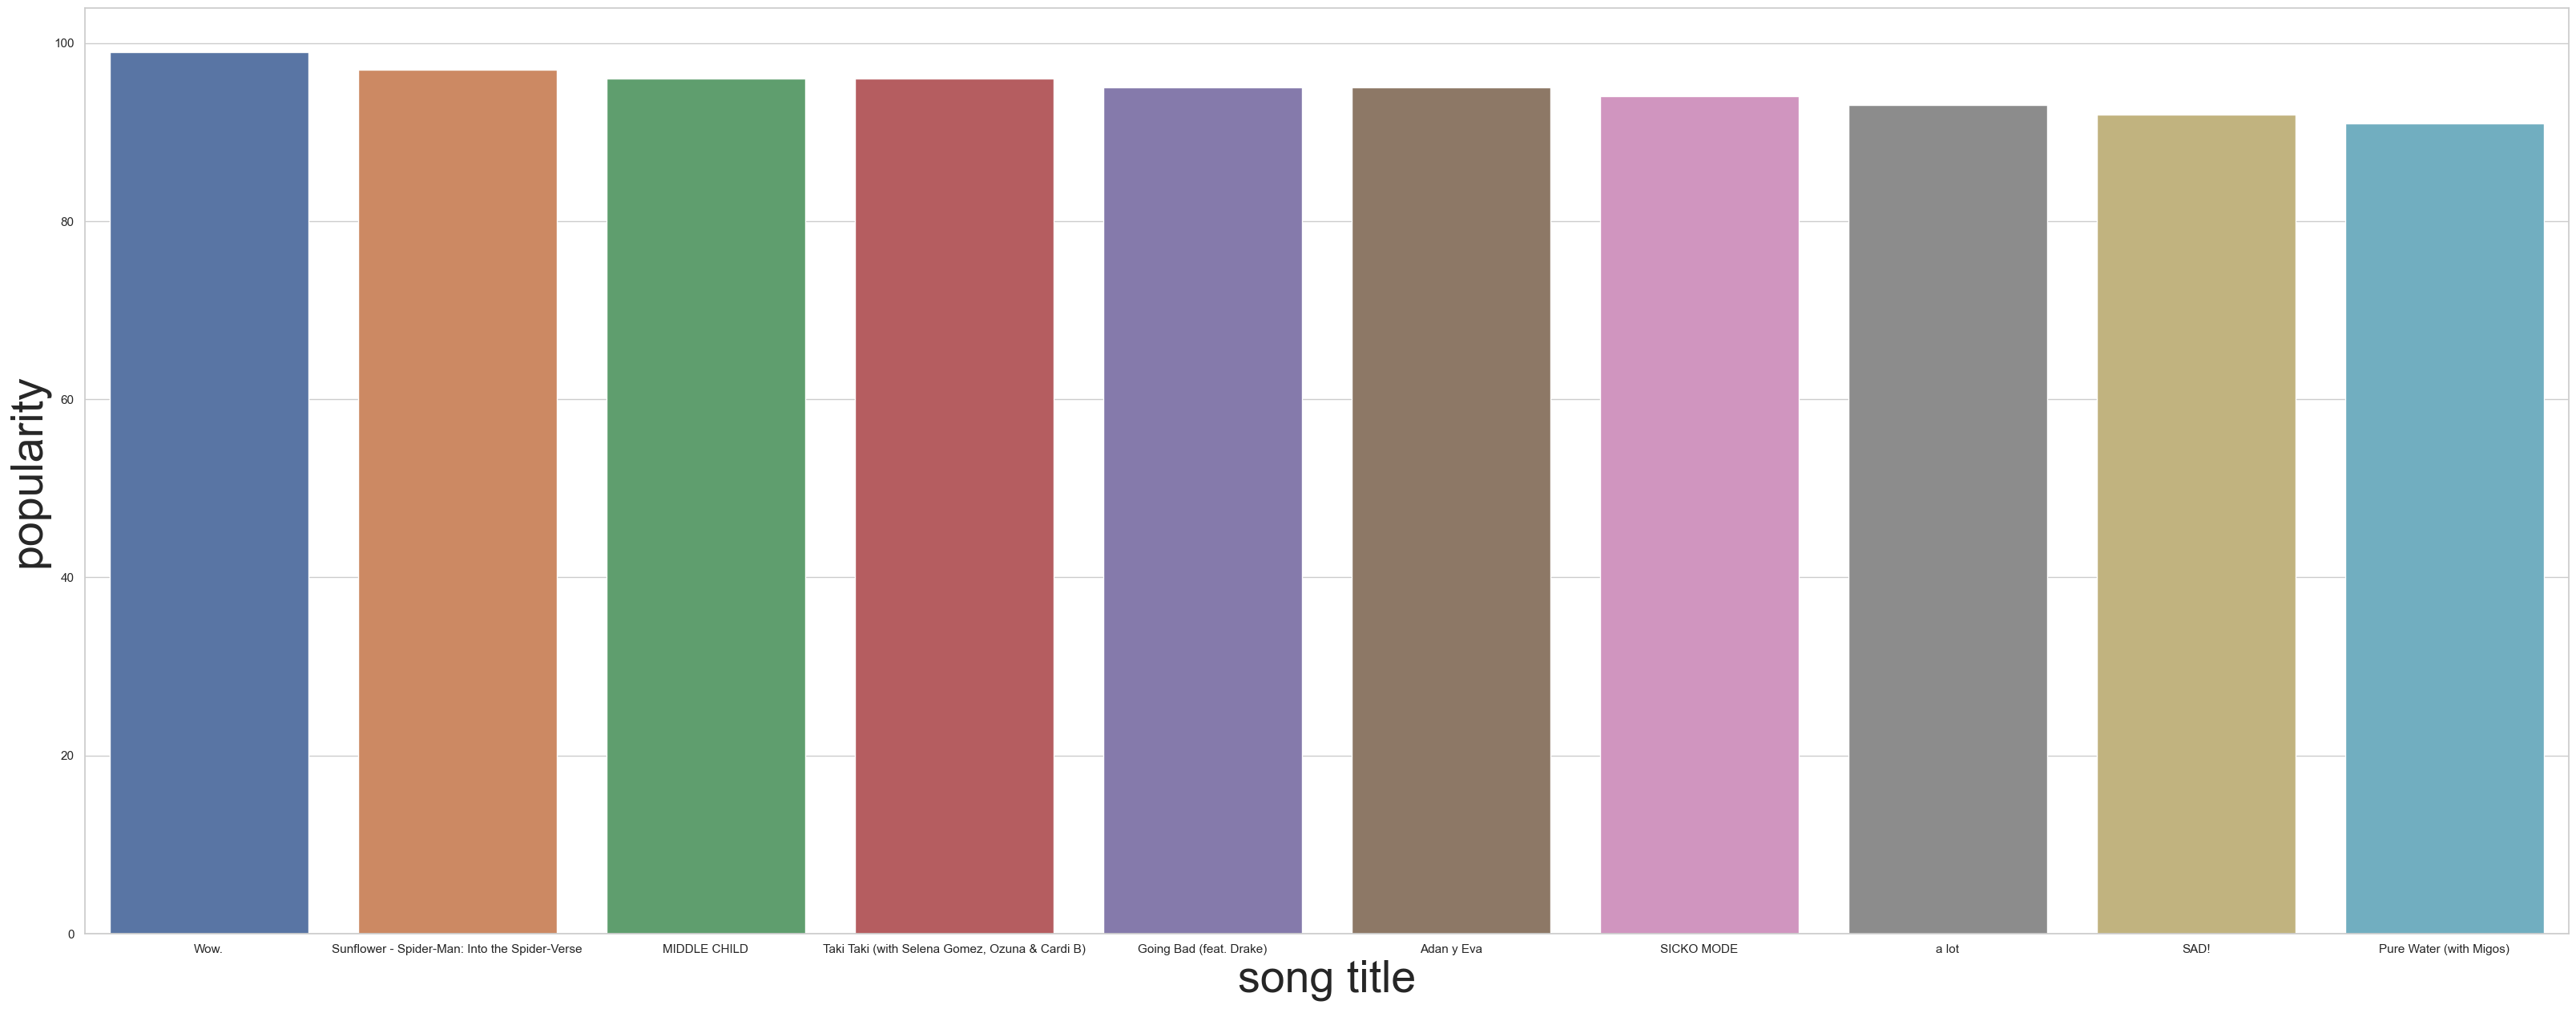

In [12]:
plt.figure(figsize=(40, 15))
sns.set(style="whitegrid")

# group by the song's name and rank them base on their popularity
x = Data.groupby("track_name")["popularity"].mean().sort_values(ascending=False).head(10)
axis = sns.barplot(x=x.index, y=x)

axis.set_ylabel('popularity', fontsize=40)
axis.set_xlabel('song title', fontsize=40)

### Top 10 artists

Text(0.5, 0, 'artist')

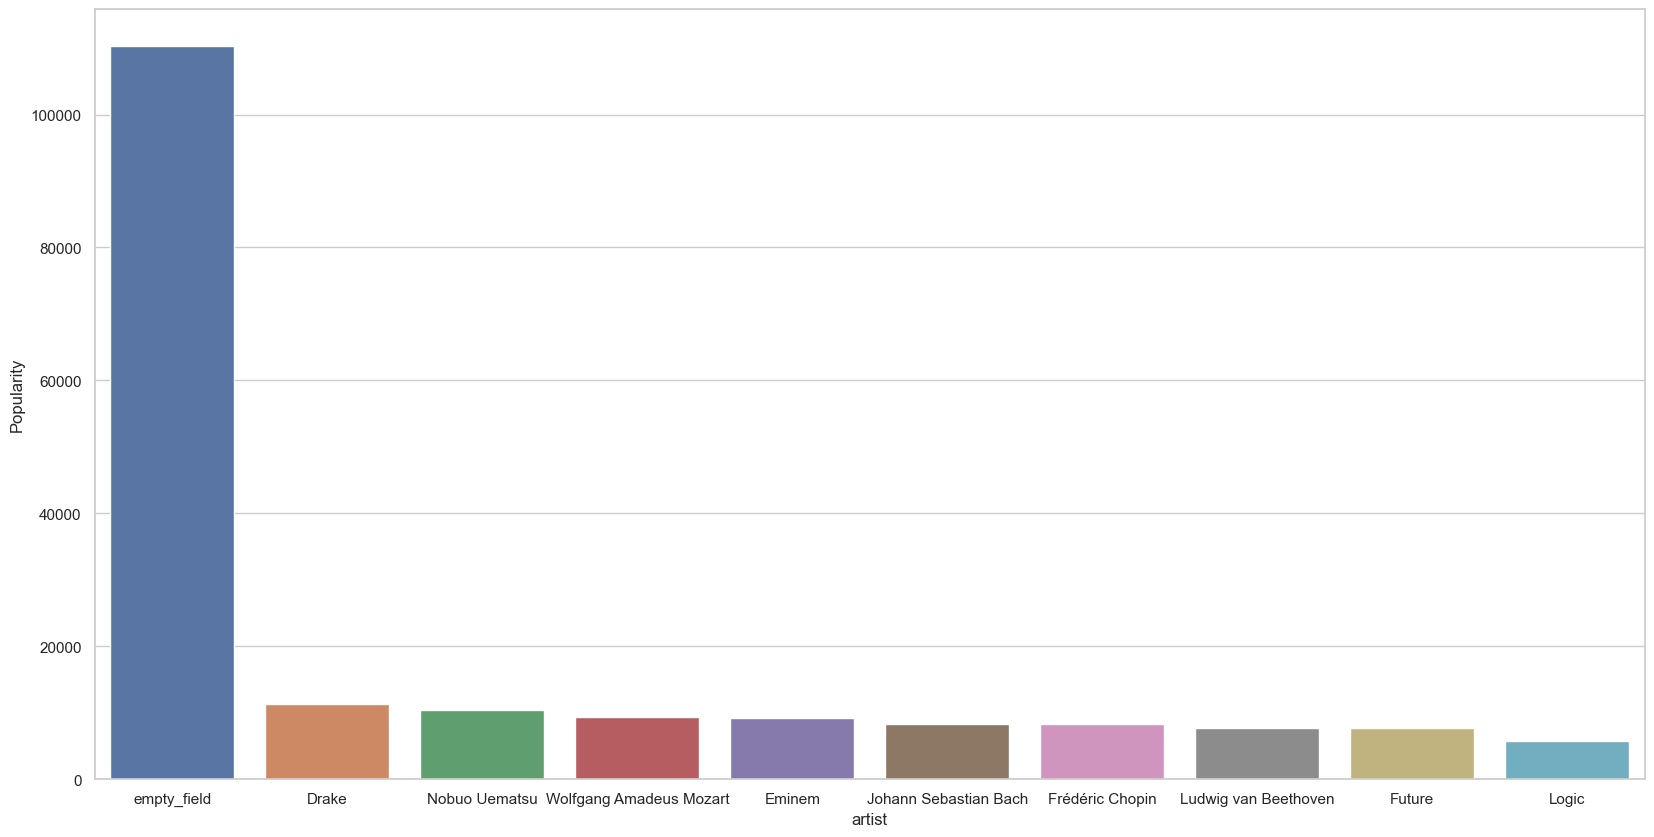

In [13]:
from collections import Counter

artist_popularity_sum = Counter()

# since a song can have different artists, we add the popularity score to each 
# artists
for l in Data[["artist_name", "popularity"]].to_numpy():
    artist_list = [x.strip() for x in l[0].split(',')]
    for artist in artist_list:
        artist_popularity_sum[artist] += float(l[1])


top_10_artist = artist_popularity_sum.most_common(10)
xs = [a[0] for a in top_10_artist]
ys = [a[1] for a in top_10_artist]

plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
axis = sns.barplot(x=xs, y=ys)

axis.set_ylabel('Popularity')
axis.set_xlabel('artist')

### Relationship between energy and popularity

Text(0.5, 1.0, 'mean energy for song popularity')

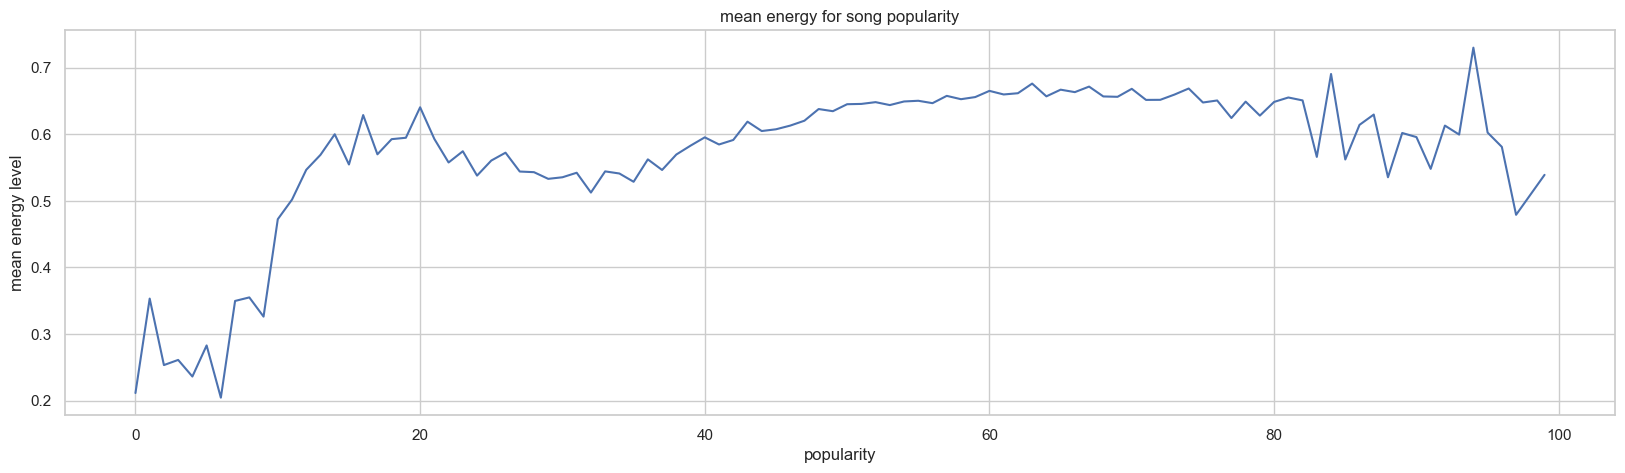

In [14]:
plt.figure(figsize=(20, 5))
sns.set(style="whitegrid")

# group by the song's popularity and then get the mean energy
x =   Data.groupby("popularity")["energy"].mean()
axis = sns.lineplot(x=x.index, y=x)

axis.set_ylabel('mean energy level')
axis.set_xlabel('popularity')
axis.set_title("mean energy for song popularity")

### Relationship between livliness and popularity

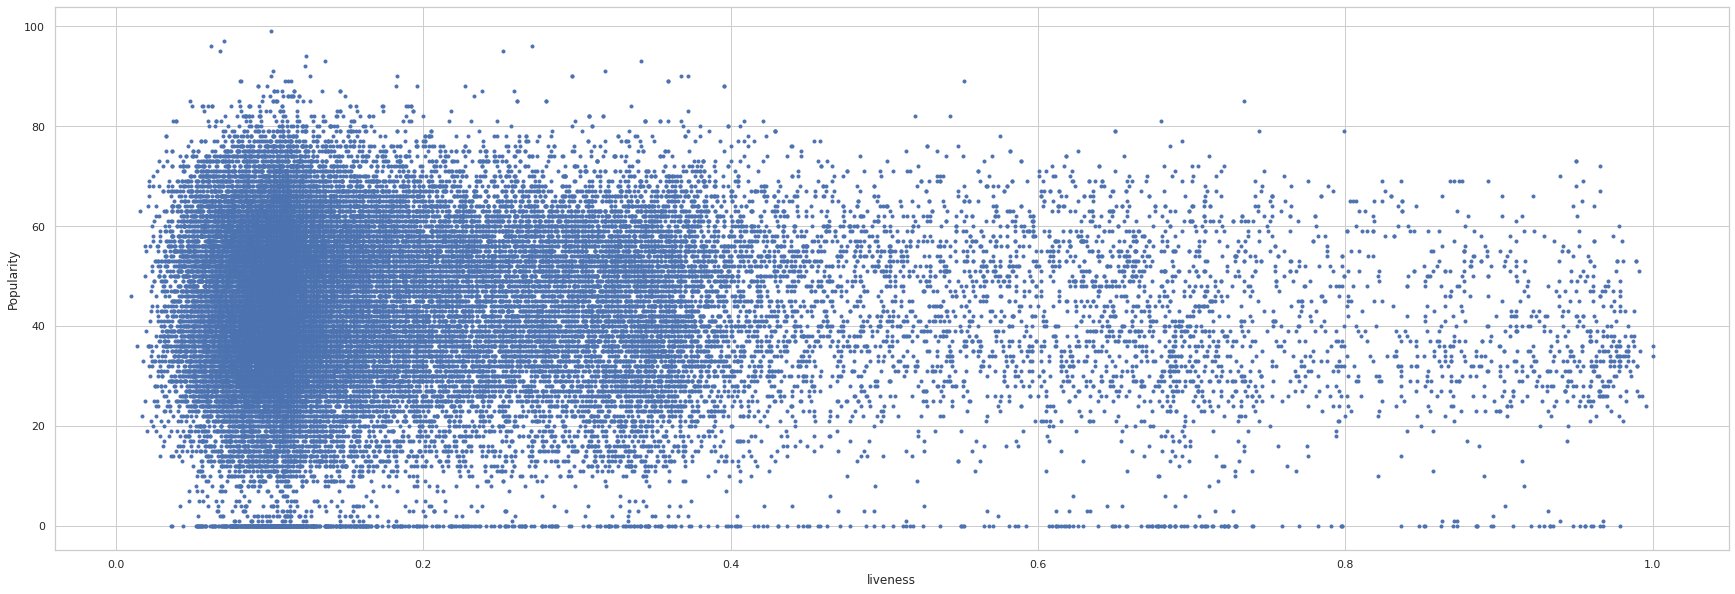

In [125]:
plt.figure(figsize=(30, 10))

xs = Data["liveness"].to_numpy()
ys = Data["popularity"].to_numpy()
plt.ylabel('Popularity')
plt.xlabel('liveness')

plt.plot(xs, ys, '.')
plt.show()

Text(0.5, 1.0, 'mean livness for song popularity')

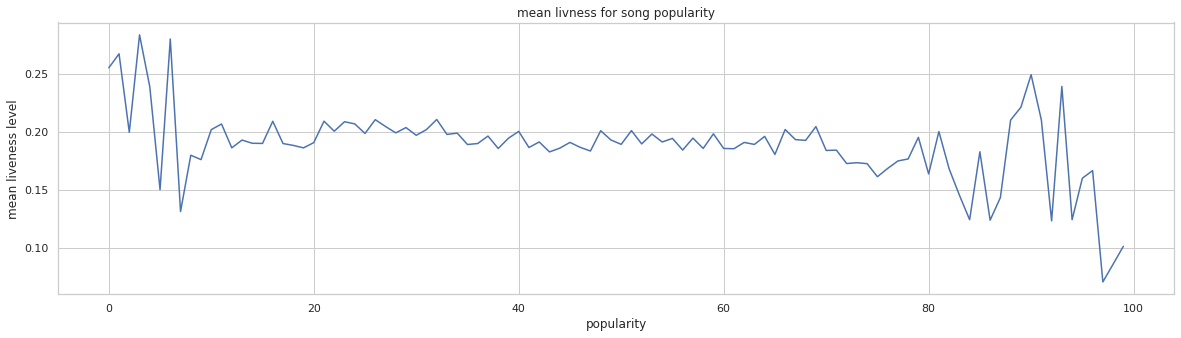

In [126]:
plt.figure(figsize=(20, 5))
sns.set(style="whitegrid")

# group by the song's popularity and then get the mean energy
x = Data.groupby("popularity")["liveness"].mean()
axis = sns.lineplot(x=x.index, y=x)

axis.set_ylabel('mean liveness level')
axis.set_xlabel('popularity')
axis.set_title("mean livness for song popularity")

In [127]:
Data.loc[Data["popularity"] == 97][["artist_name", "popularity", "liveness"]]

,artist_name,popularity,liveness
25194,Post Malone,97.0,0.0703


Text(0.5, 1.0, 'mean acousticness for song popularity')

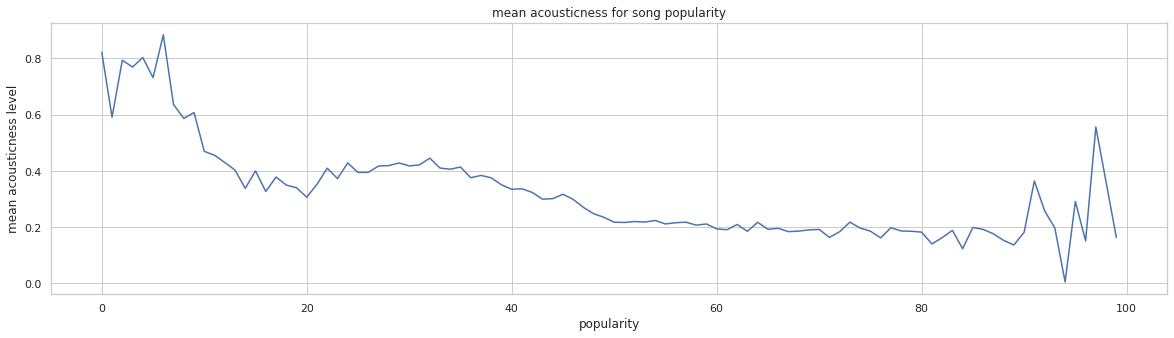

In [128]:
plt.figure(figsize=(20, 5))
sns.set(style="whitegrid")

# group by the song's popularity and then get the mean energy
x = Data.groupby("popularity")["acousticness"].mean()
axis = sns.lineplot(x=x.index, y=x)

axis.set_ylabel('mean acousticness level')
axis.set_xlabel('popularity')
axis.set_title("mean acousticness for song popularity")

In [129]:
Data['obtained_date'].nunique()

5

In [130]:
Data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


Text(0.5, 0, 'song\xa0title')

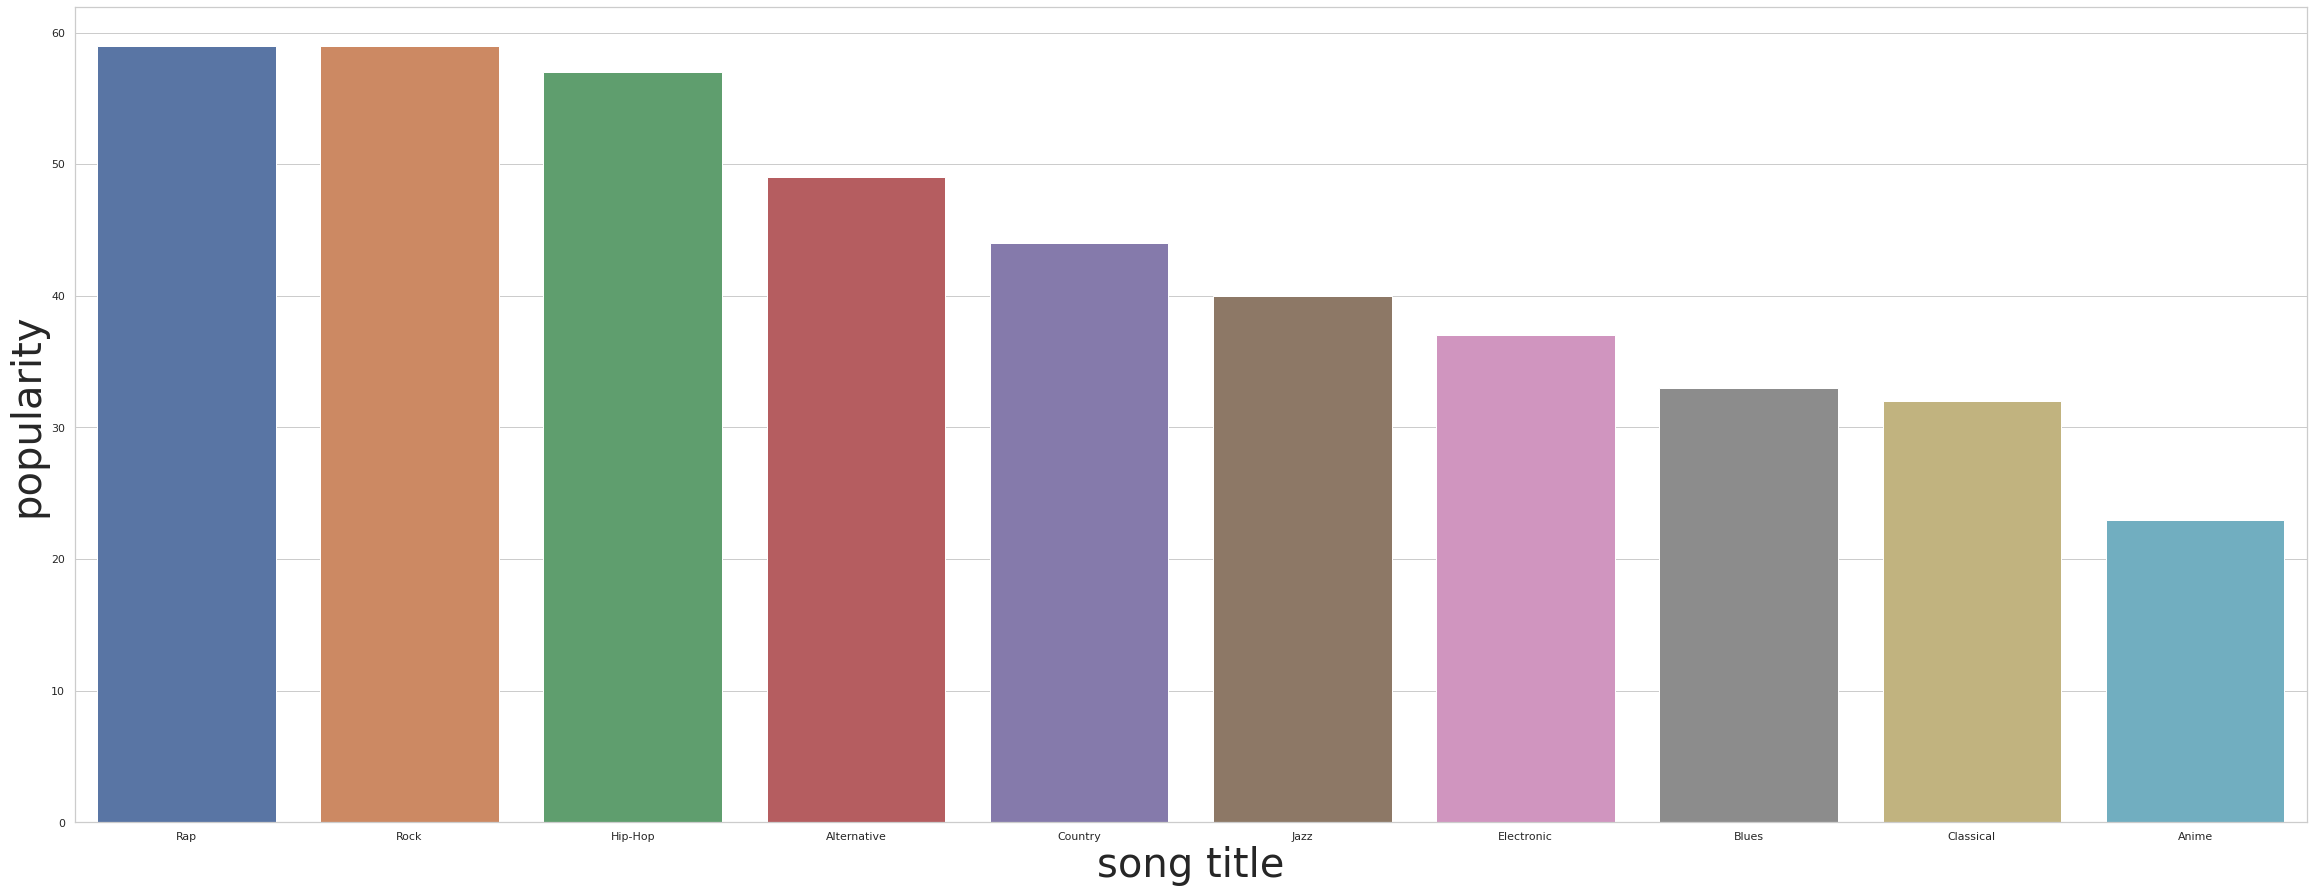

In [131]:
plt.figure(figsize=(40,15))
sns.set(style="whitegrid")

# group by the music's genre and rank them base on their popularity

x=Data.groupby("music_genre")["popularity"].median().sort_values(ascending=False).head(10)
axis=sns.barplot(x=x.index,y=x)


axis.set_ylabel('popularity',fontsize=40)

axis.set_xlabel('song title',fontsize=40)

In [132]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [133]:
Data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [134]:
Data["track_name"].nunique()

41699

In [135]:
print(Data.shape)

(50000, 18)


### Variable Key

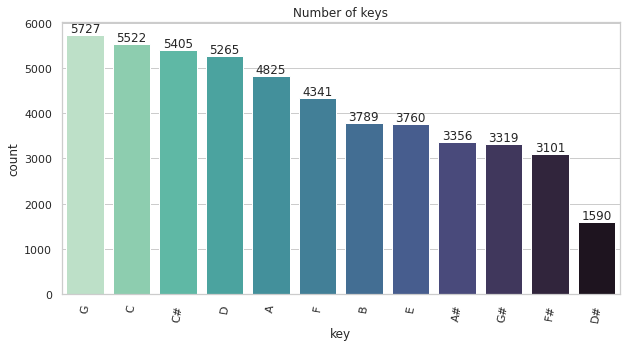

In [136]:
fig, ax  = plt.subplots(figsize=(10,5))
ax=sns.countplot(x='key', data=Data, palette='mako_r', order = Data['key'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
ax.bar_label(ax.containers[0])
plt.title('Number of keys')
plt.show()

###  Variable "tempo"

In [137]:
Data["tempo"].head(15)

0                100.889
1     115.00200000000001
2                127.994
3                128.014
4                145.036
5                      ?
6                149.995
7                120.008
8     149.94799999999998
9                139.933
10                57.528
11               178.543
12               128.043
13               154.745
14               139.911
Name: tempo, dtype: object

In [138]:
Data[Data["tempo"]=="?"]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
5,89064.0,Axel Boman,Hello,47.0,0.00523,0.755,519468.0,0.731,0.854000,D,0.2160,-10.517,Minor,0.0412,?,4-Apr,0.6140,Electronic
32,25836.0,PEEKABOO,Arrival,45.0,0.02330,0.729,274286.0,0.869,0.585000,F,0.0944,-7.569,Minor,0.1290,?,4-Apr,0.1380,Electronic
35,27048.0,Fabian Mazur,If U Wanted To,33.0,0.10800,0.493,-1.0,0.682,0.000000,A,0.1960,-5.781,Minor,0.2870,?,4-Apr,0.2390,Electronic
36,55617.0,Wax Tailor,The Games You Play,45.0,0.04780,0.646,253333.0,0.649,0.002520,G,0.3530,-5.259,Major,0.1170,?,4-Apr,0.7270,Electronic
39,69685.0,Dahu,Vessel,37.0,0.20300,0.769,429941.0,0.551,0.882000,A#,0.1090,-12.520,Minor,0.0408,?,4-Apr,0.0618,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49918,63058.0,Big Sean,Bigger Than Me,58.0,0.29600,0.379,292520.0,0.644,0.000000,A#,0.3130,-7.933,Minor,0.1120,?,5-Apr,0.1440,Hip-Hop
49964,53387.0,Millonario,Rayas de Patrón,59.0,0.08470,0.929,215200.0,0.737,0.000000,G#,0.8610,-6.424,Major,0.1020,?,4-Apr,0.8860,Hip-Hop
49967,76585.0,MadeinTYO,I Want (feat. 2 Chainz),62.0,0.17900,0.860,233293.0,0.625,0.000136,D,0.3000,-6.922,Major,0.1050,?,4-Apr,0.2210,Hip-Hop
49976,79654.0,Big Sean,Sunday Morning Jetpack,52.0,0.70000,0.462,225067.0,0.741,0.000000,A#,0.3400,-8.008,Minor,0.1620,?,4-Apr,0.5890,Hip-Hop


In [139]:
Data["tempo"]=Data["tempo"].replace('?',np.nan)
Data["tempo"]=Data["tempo"].astype(float)
print(Data["tempo"])
Data.info()

0        100.889
1        115.002
2        127.994
3        128.014
4        145.036
          ...   
50000     98.028
50001    122.043
50002    131.079
50003     75.886
50004     99.201
Name: tempo, Length: 50000, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12

In [140]:
Data['tempo'].isnull().sum()

4980

In [141]:
Data.groupby(['music_genre'])['tempo'].mean()

music_genre
Alternative    122.547235
Anime          126.799978
Blues          121.379962
Classical      104.053190
Country        123.784286
Electronic     125.930571
Hip-Hop        120.154134
Jazz           111.699415
Rap            120.585501
Rock           122.669614
Name: tempo, dtype: float64

In [142]:
Data['tempo']=Data['tempo'].fillna(Data.groupby(['music_genre'])['tempo'].transform('mean'))

In [143]:
Data['tempo'].isnull().sum()

0

In [144]:
#pd.to_numeric(Data["tempo"], errors='coerce').mean()

Text(0, 0.5, 'BPM')

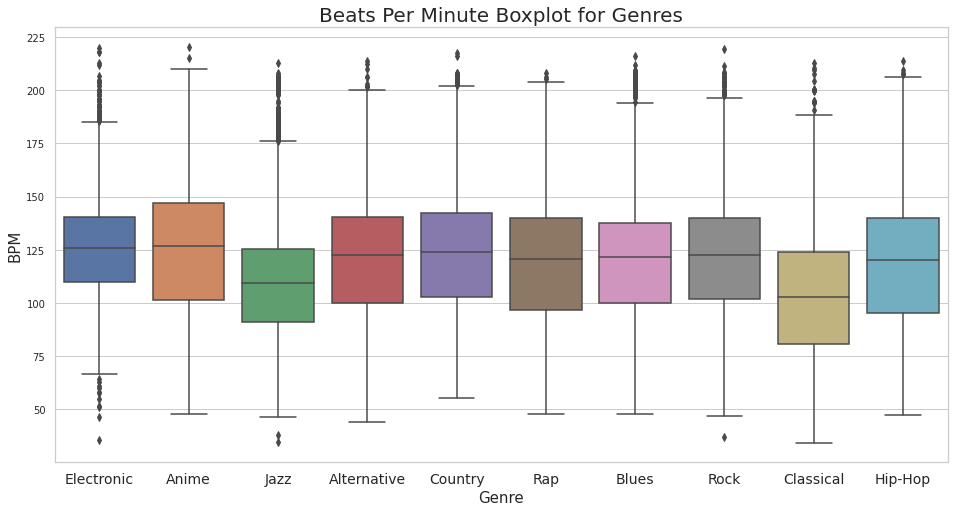

In [145]:
x = Data[["music_genre", "tempo"]]

fig, ax = plt.subplots(figsize=(16, 8));
sns.boxplot(x = "music_genre", y = "tempo", data = x);

plt.title('Beats Per Minute Boxplot for Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
#plt.savefig("BPM_Boxplot.png")

<Axes: >

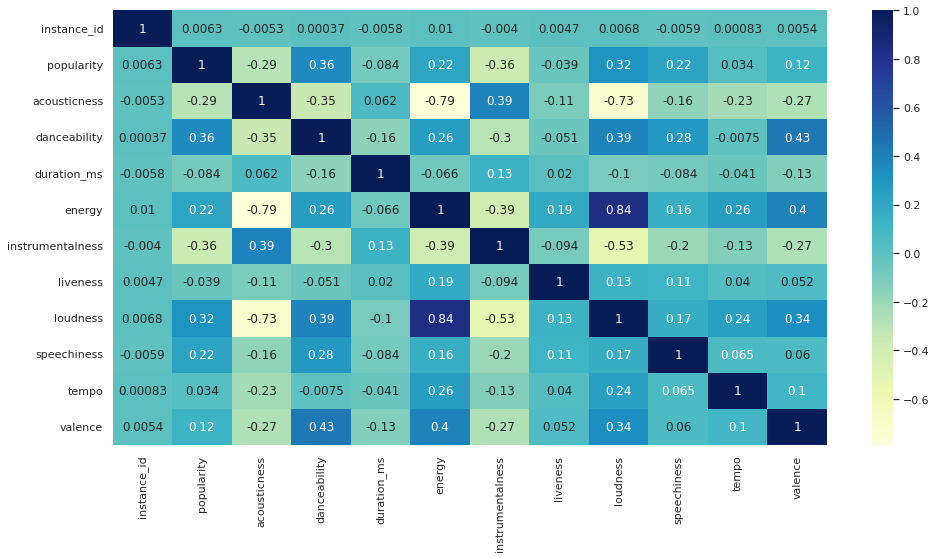

In [146]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr = Data.corr()
sns.heatmap(corr,annot=True, cmap="YlGnBu")

In [147]:
Data.drop("instance_id",axis=1,inplace=True)
Data.drop("track_name",axis=1,inplace=True)
Data.drop("obtained_date",axis=1,inplace=True)

In [148]:
Data

,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,Röyksopp,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,Thievery Corporation,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,0.531,Electronic
2,Dillon Francis,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,Dubloadz,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,What So Not,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,BEXEY,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.028,0.330,Hip-Hop
50001,Roy Woods,72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.043,0.113,Hip-Hop
50002,Berner,51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,0.395,Hip-Hop
50003,The-Dream,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.886,0.354,Hip-Hop


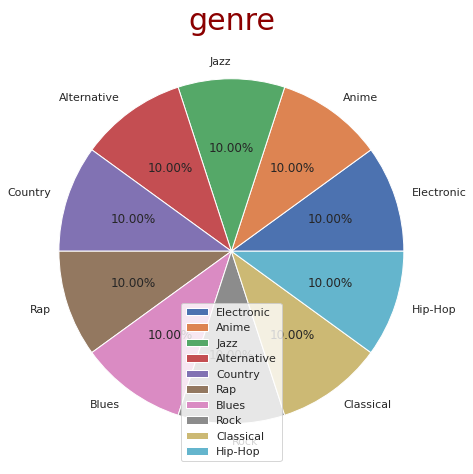

In [149]:
import seaborn as sns
genre = Data["music_genre"].value_counts()

plt.figure(figsize=(17, 17))
plt.subplot(1,2,2)
plt.pie(genre.values, labels=genre.index, autopct='%1.2f%%')
plt.title('genre',color = 'darkred',fontsize = 30)
plt.legend()
plt.show()

In [150]:
Data.groupby('music_genre')


In [151]:
count=0
for i in Data["music_genre"]:
  if i=='Electronic':
    count+=1
print(count)

5000


In [152]:
for col in Data.select_dtypes('object'):
    print(f'{col:-<50}{Data[col].unique()}')

artist_name---------------------------------------['Röyksopp' 'Thievery Corporation' 'Dillon Francis' ... 'Darshan Raval'
 'Powers Pleasant' 'Millonario']
key-----------------------------------------------['A#' 'D' 'G#' 'C#' 'F#' 'B' 'G' 'F' 'A' 'C' 'E' 'D#']
mode----------------------------------------------['Minor' 'Major']
music_genre---------------------------------------['Electronic' 'Anime' 'Jazz' 'Alternative' 'Country' 'Rap' 'Blues' 'Rock'
 'Classical' 'Hip-Hop']


In [153]:
Data["mode"]=Data["mode"].replace('Major',1)
Data["mode"]=Data["mode"].replace('Minor',0)
Data["mode"]=Data["mode"].astype(int)
print(Data["mode"])
Data.info()

0        0
1        0
2        1
3        1
4        1
        ..
50000    1
50001    1
50002    1
50003    0
50004    0
Name: mode, Length: 50000, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 50004
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       50000 non-null  object 
 1   popularity        50000 non-null  float64
 2   acousticness      50000 non-null  float64
 3   danceability      50000 non-null  float64
 4   duration_ms       50000 non-null  float64
 5   energy            50000 non-null  float64
 6   instrumentalness  50000 non-null  float64
 7   key               50000 non-null  object 
 8   liveness          50000 non-null  float64
 9   loudness          50000 non-null  float64
 10  mode              50000 non-null  int64  
 11  speechiness       50000 non-null  float64
 12  tempo             50000 non-null  float64
 13  valence           50

## Variable artist name

In [154]:
grouped_df=Data.groupby(['music_genre','artist_name']).size().reset_index(name='count')
pivot_table=pd.pivot_table(grouped_df,values='count',index='artist_name',columns='music_genre',fill_value=0)

pivot_table

music_genre,Alternative,Anime,Blues,Classical,Country,Electronic,Hip-Hop,Jazz,Rap,Rock
artist_name,,,,,,,,,,
!!!,1,0,0,0,0,21,0,0,0,0
"""Weird Al"" Yankovic",0,0,0,0,0,0,0,0,0,1
$NOT,0,0,0,0,0,0,3,0,0,0
$tupid Young,0,0,0,0,0,0,0,0,1,0
$uicideBoy$,0,0,0,0,0,0,51,0,41,0
...,...,...,...,...,...,...,...,...,...,...
棗坂シキ(CV.平川大輔),0,1,0,0,0,0,0,0,0,0
楚神ウリエ(CV.近藤隆),0,2,0,0,0,0,0,0,0,0
立華リツカ(CV.茜屋日海夏),0,1,0,0,0,0,0,0,0,0


In [155]:
from scipy.sparse import csr_matrix
# Convert your data to a sparse matrix
sparse_matrix=csr_matrix(pivot_table)
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
# Assuming your data is stored in a pandas dataframe called 'df'
# Run kmeans with k=103
kmeans=KMeans(n_clusters=109, random_state=42)
cos_sim_matrix = cosine_similarity(sparse_matrix)
cluster_labels = kmeans.fit_predict(cos_sim_matrix)
a=pd.DataFrame(pivot_table)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [156]:
diction={}
for i in range(6863):
    diction[a.index[i]]=cluster_labels[i]
diction

{'!!!': 0,
 '"Weird Al" Yankovic': 2,
 '$NOT': 8,
 '$tupid Young': 3,
 '$uicideBoy$': 98,
 '(Hed) P.E.': 4,
 '(Sandy) Alex G': 4,
 '03 Greedo': 11,
 '04 Limited Sazabys': 9,
 '070 Shake': 19,
 '10 Years': 31,
 '10,000 Maniacs': 2,
 '1000mods': 41,
 '10cc': 2,
 '11 Acorn Lane': 1,
 '112': 53,
 '116': 8,
 '11:11': 4,
 '12 Stones': 4,
 '12th Planet': 0,
 '164': 9,
 '1788-L': 0,
 '1K Phew': 8,
 '1takejay': 3,
 '2 Chainz': 94,
 '2 LIVE CREW': 94,
 '21 Savage': 53,
 '22Gz': 3,
 '24hrs': 19,
 '27CLUB': 3,
 '2Baba': 8,
 '2Pac': 53,
 '2nd Exit': 1,
 '3 Doors Down': 14,
 '3-11 Porter': 1,
 '311': 91,
 '38 Special': 58,
 '3LAU': 0,
 '3OH!3': 3,
 '3rd Force': 1,
 '40mP': 9,
 '4B': 0,
 '50 Cent': 53,
 '6 Dogs': 98,
 '641': 6,
 '65daysofstatic': 2,
 '6LACK': 12,
 '6ix9ine': 3,
 '6u5': 1,
 '7Horse': 41,
 '7eventh Time Down': 10,
 '808 State': 0,
 '88GLAM': 98,
 '916frosty': 3,
 '9th Wonder': 8,
 '? & The Mysterians': 2,
 'A Boogie Wit da Hoodie': 3,
 'A Flock Of Seagulls': 2,
 'A Forest Mighty Black'

In [157]:
Data['cluster'] = Data['artist_name'].replace(diction)

In [158]:
dummies=pd.get_dummies(Data['cluster'], prefix='column_name')
copy_data=Data.copy()

In [159]:
def assign_genre(row):
    if row['music_genre']=='Jazz' or row['music_genre']=='Blues' or row['music_genre']=='Classical':
        return 1
    else:
        return 0
# Appliquer la fonction à chaque ligne de la dataframe pour créer une nouvelle colonne "is_hrbb" 
Data['Jazz_Blues_Classical'] = Data.apply(assign_genre, axis=1)
# Afficher la dataframe avec la nouvelle colonne
Data.head()

,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre,cluster,Jazz_Blues_Classical
0,Röyksopp,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,0,0.0748,100.889,0.759,Electronic,44,0
1,Thievery Corporation,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,0,0.0300,115.002,0.531,Electronic,16,0
2,Dillon Francis,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,1,0.0345,127.994,0.333,Electronic,0,0
3,Dubloadz,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,1,0.2390,128.014,0.270,Electronic,0,0
4,What So Not,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,1,0.0413,145.036,0.323,Electronic,0,0


In [160]:
from sklearn.preprocessing import LabelEncoder

# assume your column of 12 objects is named 'category_column'
encoder = LabelEncoder()
Data['key'] = encoder.fit_transform(Data['key'])
Data['music_genre'] = encoder.fit_transform(Data['music_genre'])

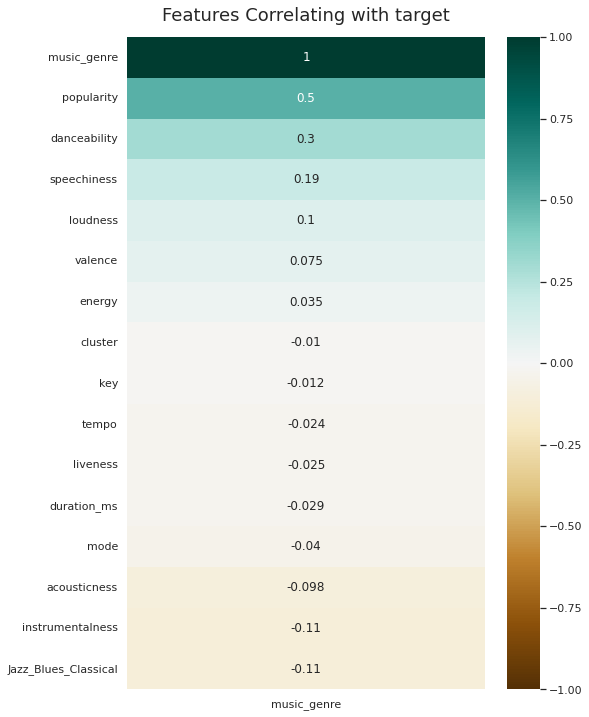

In [161]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(Data.corr()[['music_genre']].sort_values(by='music_genre', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with target', fontdict={'fontsize':18}, pad=16);

In [162]:
Data = pd.concat([Data,dummies], axis=1)
Data = Data.drop('cluster',axis=1)
Data.drop("artist_name",axis=1,inplace=True)

In [163]:
Data.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,...,column_name_99,column_name_100,column_name_101,column_name_102,column_name_103,column_name_104,column_name_105,column_name_106,column_name_107,column_name_108
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,1,0.115,-5.201,0,...,0,0,0,0,0,0,0,0,0,0
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,5,0.124,-7.043,0,...,0,0,0,0,0,0,0,0,0,0
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,11,0.534,-4.617,1,...,0,0,0,0,0,0,0,0,0,0
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,4,0.157,-4.498,1,...,0,0,0,0,0,0,0,0,0,0
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,9,0.157,-6.266,1,...,0,0,0,0,0,0,0,0,0,0


In [164]:
Y = Data['music_genre']
X = Data.drop(columns=['music_genre'])

In [165]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X[:]=ss.fit_transform(X)
X

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,...,column_name_99,column_name_100,column_name_101,column_name_102,column_name_103,column_name_104,column_name_105,column_name_106,column_name_107,column_name_108
0,-1.108003,-0.883886,0.524878,-1.719534,1.289876,1.875809,-1.259526,-0.488113,0.638132,-1.339082,...,-0.008945,-0.016127,-0.016127,-0.127353,-0.05719,-0.021914,-0.010001,-0.010001,-0.053367,-0.034079
1,-0.850633,-0.860390,0.356933,-0.023001,1.097101,2.361357,-0.102517,-0.432433,0.339248,-1.339082,...,-0.008945,-0.016127,-0.016127,-0.127353,-0.05719,-0.021914,-0.010001,-0.010001,-0.053367,-0.034079
2,-1.043661,-0.888632,0.345737,-0.043830,0.586813,-0.521812,1.632996,2.104140,0.732892,0.746780,...,-0.008945,-0.016127,-0.016127,-0.127353,-0.05719,-0.021914,-0.010001,-0.010001,-0.053367,-0.034079
3,-0.657606,-0.823184,1.207853,-0.422611,0.378918,-0.550300,-0.391769,-0.228269,0.752201,0.746780,...,-0.008945,-0.016127,-0.016127,-0.127353,-0.05719,-0.021914,-0.010001,-0.010001,-0.053367,-0.034079
4,-0.786291,-0.883974,0.446504,0.008676,-0.048212,2.235361,1.054492,-0.228269,0.465324,0.746780,...,-0.008945,-0.016127,-0.016127,-0.127353,-0.05719,-0.021914,-0.010001,-0.010001,-0.053367,-0.034079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,0.950954,-0.799746,1.985998,-1.719534,-0.097351,-0.558074,-0.391769,-0.463366,0.342655,0.746780,...,-0.008945,-0.016127,-0.016127,-0.127353,-0.05719,-0.021914,-0.010001,-0.010001,-0.053367,-0.034079
50001,1.787405,-0.437640,0.843973,0.237874,-0.898692,-0.558074,-0.970273,-0.525234,-0.110376,0.746780,...,-0.008945,-0.016127,-0.016127,-0.127353,-0.05719,-0.021914,-0.010001,-0.010001,-0.053367,-0.034079
50002,0.436214,-0.880107,0.754403,-0.246906,0.617052,-0.558074,-0.102517,-0.314884,0.598865,0.746780,...,-0.008945,-0.016127,-0.016127,-0.127353,-0.05719,-0.021914,-0.010001,-0.010001,-0.053367,-0.034079
50003,1.337008,-0.654142,1.252639,0.322687,-0.482901,-0.558074,1.343744,-0.543794,0.668150,-1.339082,...,-0.008945,-0.016127,-0.016127,-0.127353,-0.05719,-0.021914,-0.010001,-0.010001,-0.053367,-0.034079


In [166]:
Y

0        5
1        5
2        5
3        5
4        5
        ..
50000    6
50001    6
50002    6
50003    6
50004    6
Name: music_genre, Length: 50000, dtype: int64

In [167]:
Data.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,...,column_name_99,column_name_100,column_name_101,column_name_102,column_name_103,column_name_104,column_name_105,column_name_106,column_name_107,column_name_108
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,1,0.115,-5.201,0,...,0,0,0,0,0,0,0,0,0,0
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,5,0.124,-7.043,0,...,0,0,0,0,0,0,0,0,0,0
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,11,0.534,-4.617,1,...,0,0,0,0,0,0,0,0,0,0
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,4,0.157,-4.498,1,...,0,0,0,0,0,0,0,0,0,0
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,9,0.157,-6.266,1,...,0,0,0,0,0,0,0,0,0,0


In [168]:
Data.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,...,column_name_99,column_name_100,column_name_101,column_name_102,column_name_103,column_name_104,column_name_105,column_name_106,column_name_107,column_name_108
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,1,0.115,-5.201,0,...,0,0,0,0,0,0,0,0,0,0
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,5,0.124,-7.043,0,...,0,0,0,0,0,0,0,0,0,0
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,11,0.534,-4.617,1,...,0,0,0,0,0,0,0,0,0,0
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,4,0.157,-4.498,1,...,0,0,0,0,0,0,0,0,0,0
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,9,0.157,-6.266,1,...,0,0,0,0,0,0,0,0,0,0


In [169]:
Data.to_csv('music_genre_cleaned.csv', encoding='utf-8')

### Classification binaire

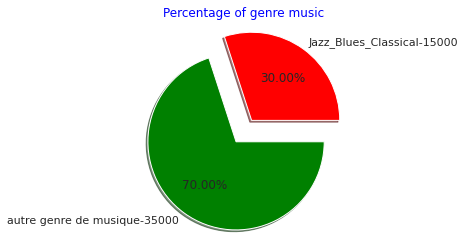

0    0.7
1    0.3
Name: Jazz_Blues_Classical, dtype: float64

In [170]:
pie_labels=['Jazz_Blues_Classical-'+str(Data['Jazz_Blues_Classical'][Data.Jazz_Blues_Classical==1].count()),'autre genre de musique-'+str(Data['Jazz_Blues_Classical'][Data.Jazz_Blues_Classical==0].count())]
pie_share=[Data['Jazz_Blues_Classical'][Data.Jazz_Blues_Classical==1].count()/Data['Jazz_Blues_Classical'].count(),
           Data['Jazz_Blues_Classical'][Data.Jazz_Blues_Classical==0].count()/Data['Jazz_Blues_Classical'].count()]
figureObject, axesObject = plt.subplots()
pie_colors=('red','green')
pie_explode=(.3,.0)
axesObject.pie(pie_share,labels=pie_labels,explode=pie_explode,autopct='%.2f%%',colors=pie_colors,startangle=0,shadow=True)
axesObject.axis('equal')
plt.title('Percentage of genre music',color='blue')
plt.show()
y_true = Data["Jazz_Blues_Classical"]
Data["Jazz_Blues_Classical"].value_counts(normalize=True)

In [171]:
Data["Jazz_Blues_Classical"].head()

0    0
1    0
2    0
3    0
4    0
Name: Jazz_Blues_Classical, dtype: int64

In [172]:
Data.drop("music_genre",axis=1,inplace=True)

In [173]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X = Data.drop('Jazz_Blues_Classical',1)
y = Data.Jazz_Blues_Classical

<ipython-input-173-d511a2178652>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = Data.drop('Jazz_Blues_Classical',1)


In [174]:
y

0        0
1        0
2        0
3        0
4        0
        ..
50000    0
50001    0
50002    0
50003    0
50004    0
Name: Jazz_Blues_Classical, Length: 50000, dtype: int64

In [175]:
X_train0, X_test0, y_train0, y_test0 = train_test_split(X,y , test_size = 0.3,random_state=101)

In [176]:
# instantiate the Logistic Regression classifier
logreg = LogisticRegression()

# fit the classifier to the imbalanced data
clf = logreg.fit(X, y)

# predict on the training data
y_pred = clf.predict(X)
# import the accuracy metric
from sklearn.metrics import accuracy_score


# print the accuracy
accuracy = accuracy_score(y_pred, y)

print("Accuracy : %.2f%%" % (accuracy * 100.0))

Accuracy : 79.31%


In [177]:
from imblearn.over_sampling import SMOTE,ADASYN, SVMSMOTE
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X=np.array(X)
svm_smote = SMOTE(random_state=101) #,sampling_strategy='minority', k_neighbors=5)
X_svm_smote, y_svm_smote = svm_smote.fit_resample(X,y.ravel())
X_train, X_test, y_train, y_test = train_test_split(X_svm_smote,y_svm_smote, test_size=0.30, random_state=101)

In [178]:
print("True :",((y_train==1).sum()+(y_test==1).sum()))
print("False :",((y_train==0).sum()+(y_test==0).sum()))

True : 35000
False : 35000


In [179]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    A =(((C.T)/(C.sum(axis=1))).T)
    #divide each element of the confusion matrix with the sum of elements in that column
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    # Initialise the subplot function using number of rows and column
    sns.set(font_scale=1)
    labels = [0,1]
    # representing A in heatmap format
    cmap1=sns.light_palette("orange")
    cmap2=sns.light_palette("#34c3eb")
    cmap3=sns.light_palette("purple")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap1, fmt=".3f", xticklabels=labels, yticklabels=labels,annot_kws={"size":14})
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap2, fmt=".3f", xticklabels=labels, yticklabels=labels,annot_kws={"size":14})
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap3, fmt=".3f", xticklabels=labels, yticklabels=labels,annot_kws={"size":14})
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()


def plot_roc_auc(y_test,y_pred):
    from plot_metric.functions import BinaryClassification
    # Visualisation with plot_metric
    bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 0"])

    # Figures
    plt.figure(figsize=(8,7))
    bc.plot_roc_curve()
    
    plt.show()

In [194]:
import numpy as np
from sklearn.metrics import auc, accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
result = []
#from sklearn.metrics import plot_confusion_matrix

### Knn



RESULTS :
KNN Model Acc :  0.71
KNN Model F1-score :  0.71
Classification Report :               precision    recall  f1-score   support

           0       0.71      0.72      0.71     10530
           1       0.71      0.70      0.71     10470

    accuracy                           0.71     21000
   macro avg       0.71      0.71      0.71     21000
weighted avg       0.71      0.71      0.71     21000





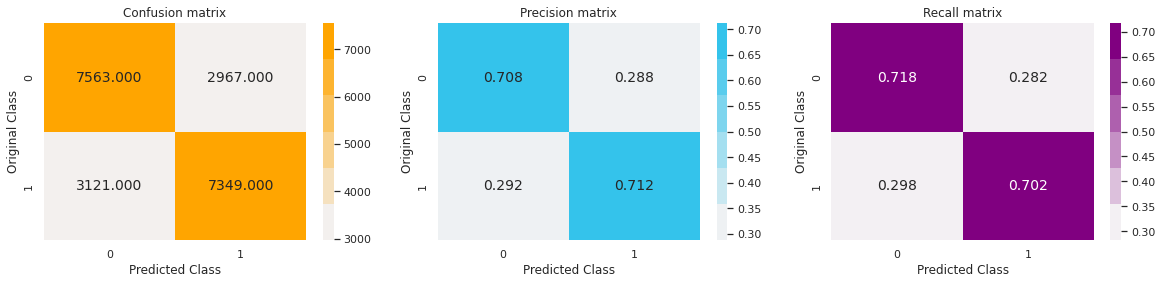

In [195]:
#knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),"weights": ["uniform","distance"],"metric":["euclidean","manhattan"]}

knn = KNeighborsClassifier(leaf_size=25, n_neighbors=8)
#clf = GridSearchCV(knn,  cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)

history=knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
cm_random_knn = confusion_matrix(y_test,y_pred_knn)
acc_random_knn = accuracy_score(y_test, y_pred_knn)
fscore = f1_score(y_test,y_pred_knn)
result.append(acc_random_knn)

print('\n')
print("RESULTS :")
print("KNN Model Acc : ",round(acc_random_knn,2))
print("KNN Model F1-score : ",round(fscore,2))
print("Classification Report :",classification_report(y_test,y_pred_knn))
print('\n')
plot_confusion_matrix(y_test, y_pred_knn)

### XGBoost

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[03:40:59] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[03:41:11] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[03:41:23] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[03:41:35] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[03:41:48] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[03:42:00] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

RESULTS : 
Best Parameters:  {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 100, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 1337, 'silent': 1, 'subsample': 0.8}
XGBoost Model Accuracy :  0.98
XGBoost Model F1-score :  0.98
Classification Report :
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     10530
           1 

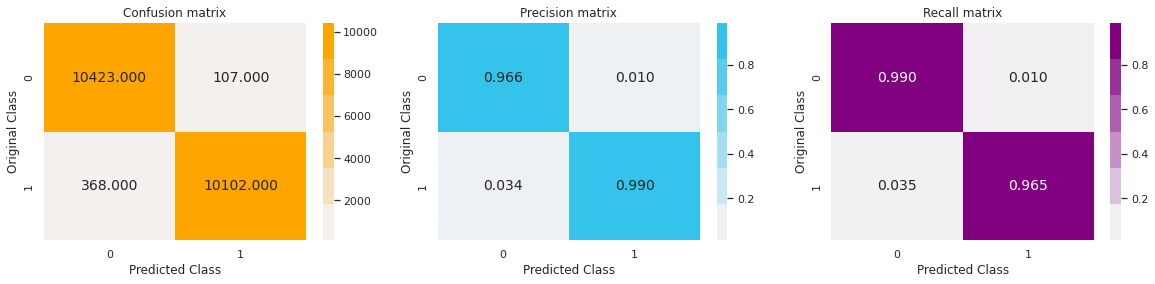

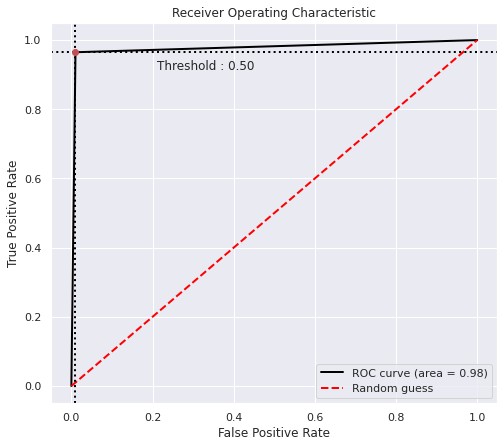

In [204]:
import xgboost as xgb
from sklearn.calibration import CalibratedClassifierCV

parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.1], #so called `eta` value
              'max_depth': [5],
              'min_child_weight': [7],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [100], #number of trees, change it to 1000 for better results
              'seed': [1337]}

XGB = xgb.XGBClassifier()
XGB = GridSearchCV(XGB, parameters, cv = StratifiedKFold(5, shuffle=True), 
                   scoring='roc_auc',
                   verbose=1, refit=True)
# XGB = CalibratedClassifierCV(XGB, method="sigmoid")
XGB.fit(X_train, y_train)
y_pred_xgb = XGB.predict(X_test)
cm_xgb = confusion_matrix(y_pred_xgb,y_test)
fscore = f1_score(y_test,y_pred_xgb)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
result.append(acc_xgb)


print("RESULTS : ")
print("Best Parameters: ", XGB.best_params_)
print("XGBoost Model Accuracy : ",round(acc_xgb,2))
print("XGBoost Model F1-score : ",round(fscore,2))
print("Classification Report :\n",classification_report(y_test,y_pred_xgb))
print('\n')
plot_confusion_matrix(y_test, y_pred_xgb)
print('\n')
plot_roc_auc(y_test,y_pred_xgb)

RESULTS :
Random Forest Model Accuracy :  0.9
Random Forest Model F1-score :  0.9
Classification Report :               precision    recall  f1-score   support

           0       0.89      0.92      0.90     10530
           1       0.92      0.88      0.90     10470

    accuracy                           0.90     21000
   macro avg       0.90      0.90      0.90     21000
weighted avg       0.90      0.90      0.90     21000





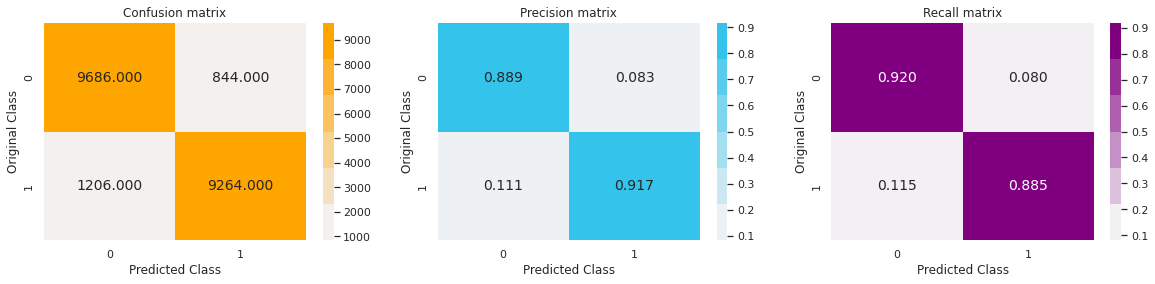

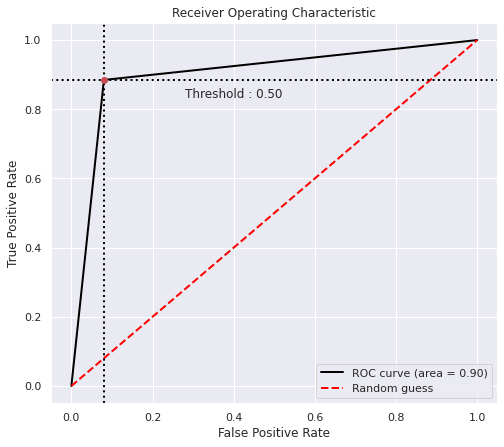

In [197]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(max_depth=2, random_state= 59)
random_forest_model.fit(X_train, y_train)
y_pred_random_forest = random_forest_model.predict(X_test)
cm_random_forest = confusion_matrix(y_pred_random_forest,y_test)
fscore = f1_score(y_test,y_pred_random_forest)
acc_random_forest = accuracy_score(y_test, y_pred_random_forest)
result.append(acc_random_forest)

print("RESULTS :")
print("Random Forest Model Accuracy : ",round(acc_random_forest,2))
print("Random Forest Model F1-score : ",round(fscore,2))
print("Classification Report :",classification_report(y_test,y_pred_random_forest))
print('\n')
plot_confusion_matrix(y_test, y_pred_random_forest)
print('\n')
plot_roc_auc(y_test,y_pred_random_forest)

###LGB

RESULTS :
LGB Model Accuracy :  0.98
LGB Model F1-score :  0.98
Classification Report :               precision    recall  f1-score   support

           0       0.98      0.99      0.98     10530
           1       0.99      0.98      0.98     10470

    accuracy                           0.98     21000
   macro avg       0.98      0.98      0.98     21000
weighted avg       0.98      0.98      0.98     21000





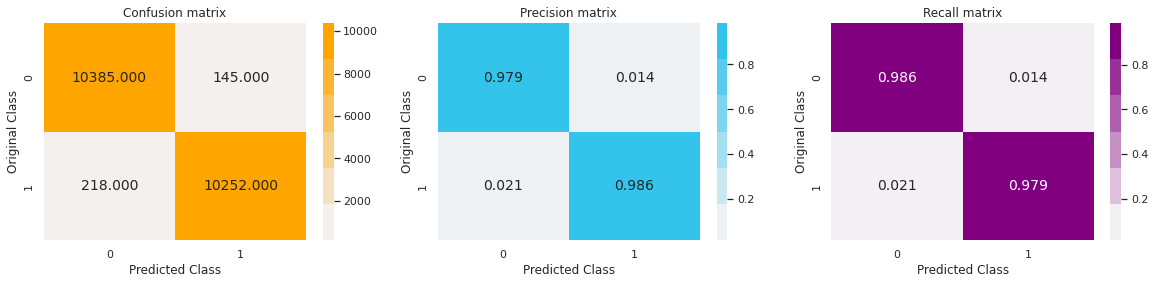

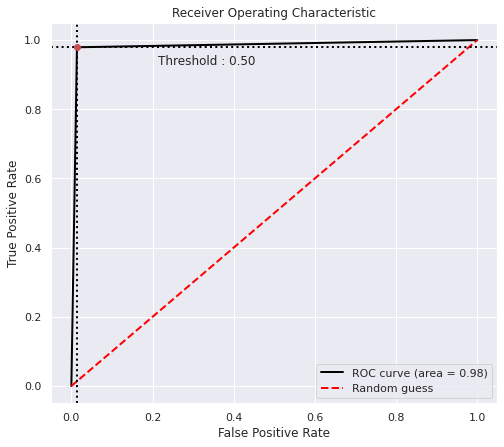

In [198]:
from lightgbm import LGBMClassifier
import lightgbm as lgb
clf_lgb = lgb.LGBMClassifier()
clf_lgb.fit(X_train, y_train)
y_pred=clf_lgb.predict(X_test)

fscore = f1_score(y_test,y_pred)
acc_lgb = accuracy_score(y_pred, y_test)
result.append(acc_lgb)

print("RESULTS :")
print("LGB Model Accuracy : ",round(acc_lgb,2))
print("LGB Model F1-score : ",round(fscore,2))
print("Classification Report :",classification_report(y_test,y_pred))
print('\n')
plot_confusion_matrix(y_test, y_pred)
print('\n')
plot_roc_auc(y_test,y_pred)

### ANN

RESULTS :
ANN Accuracy :  0.98
ANN F1-score :  0.18
Classification Report :               precision    recall  f1-score   support

           0       0.53      1.00      0.69     10530
           1       0.99      0.10      0.18     10470

    accuracy                           0.55     21000
   macro avg       0.76      0.55      0.43     21000
weighted avg       0.76      0.55      0.43     21000





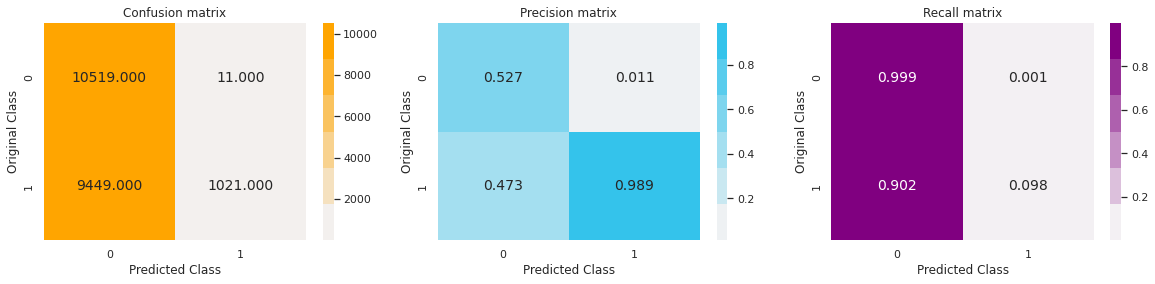

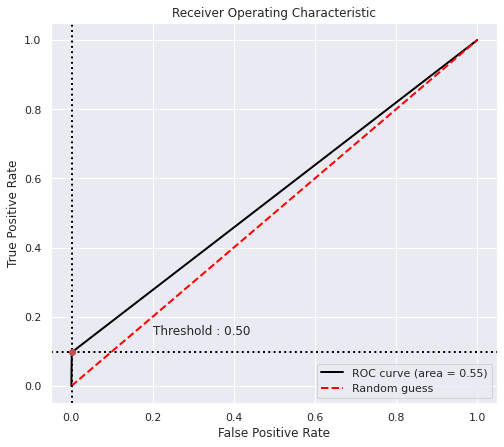

In [199]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
y_pred = mlp.predict(X_test)

fscore = f1_score(y_test,y_pred)
acc_mlp = accuracy_score(y_pred, y_test)
result.append(acc_mlp)

print("RESULTS :")
print("ANN Accuracy : ",round(acc_lgb,2))
print("ANN F1-score : ",round(fscore,2))
print("Classification Report :",classification_report(y_test,y_pred))
print('\n')
plot_confusion_matrix(y_test, y_pred)
print('\n')
plot_roc_auc(y_test,y_pred)

In [200]:
results = pd.DataFrame({"Model Result":result, "Models":["KNN","XGBoost","RandomForest","LGBM","ANN"]})

results

,Model Result,Models
0,0.710095,KNN
1,0.977381,XGBoost
2,0.902381,RandomForest
3,0.982714,LGBM
4,0.549524,ANN


In [201]:
X = Data.drop('Jazz_Blues_Classical',1)

<ipython-input-201-ccefb523ee6c>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = Data.drop('Jazz_Blues_Classical',1)


In [202]:
from sklearn.inspection import permutation_importance
import eli5
from eli5.sklearn import PermutationImportance

pimp = PermutationImportance(estimator = clf_lgb, scoring = 'f1', random_state=101, n_iter = 5)
pimp.fit(X_test, y_test);
print(eli5.show_weights(pimp, feature_names = X.columns.to_list()))

feature_imp = pd.DataFrame(np.hstack((np.array([X.columns[0:]]).T, 
                              pimp.feature_importances_.T.reshape(-1,1))), 
                              columns=['feature', 'importance'])

feature_imp['importance'] = pd.to_numeric(feature_imp['importance'])
feature_imp.sort_values(by='importance', ascending=False)

<IPython.core.display.HTML object>


,feature,importance
14,column_name_1,0.131729
20,column_name_7,0.124064
54,column_name_41,0.081701
0,popularity,0.012232
115,column_name_102,0.012021
...,...,...
93,column_name_80,-0.000088
3,duration_ms,-0.000102
7,liveness,-0.000134
10,speechiness,-0.000159


<Axes: xlabel='importance', ylabel='feature'>

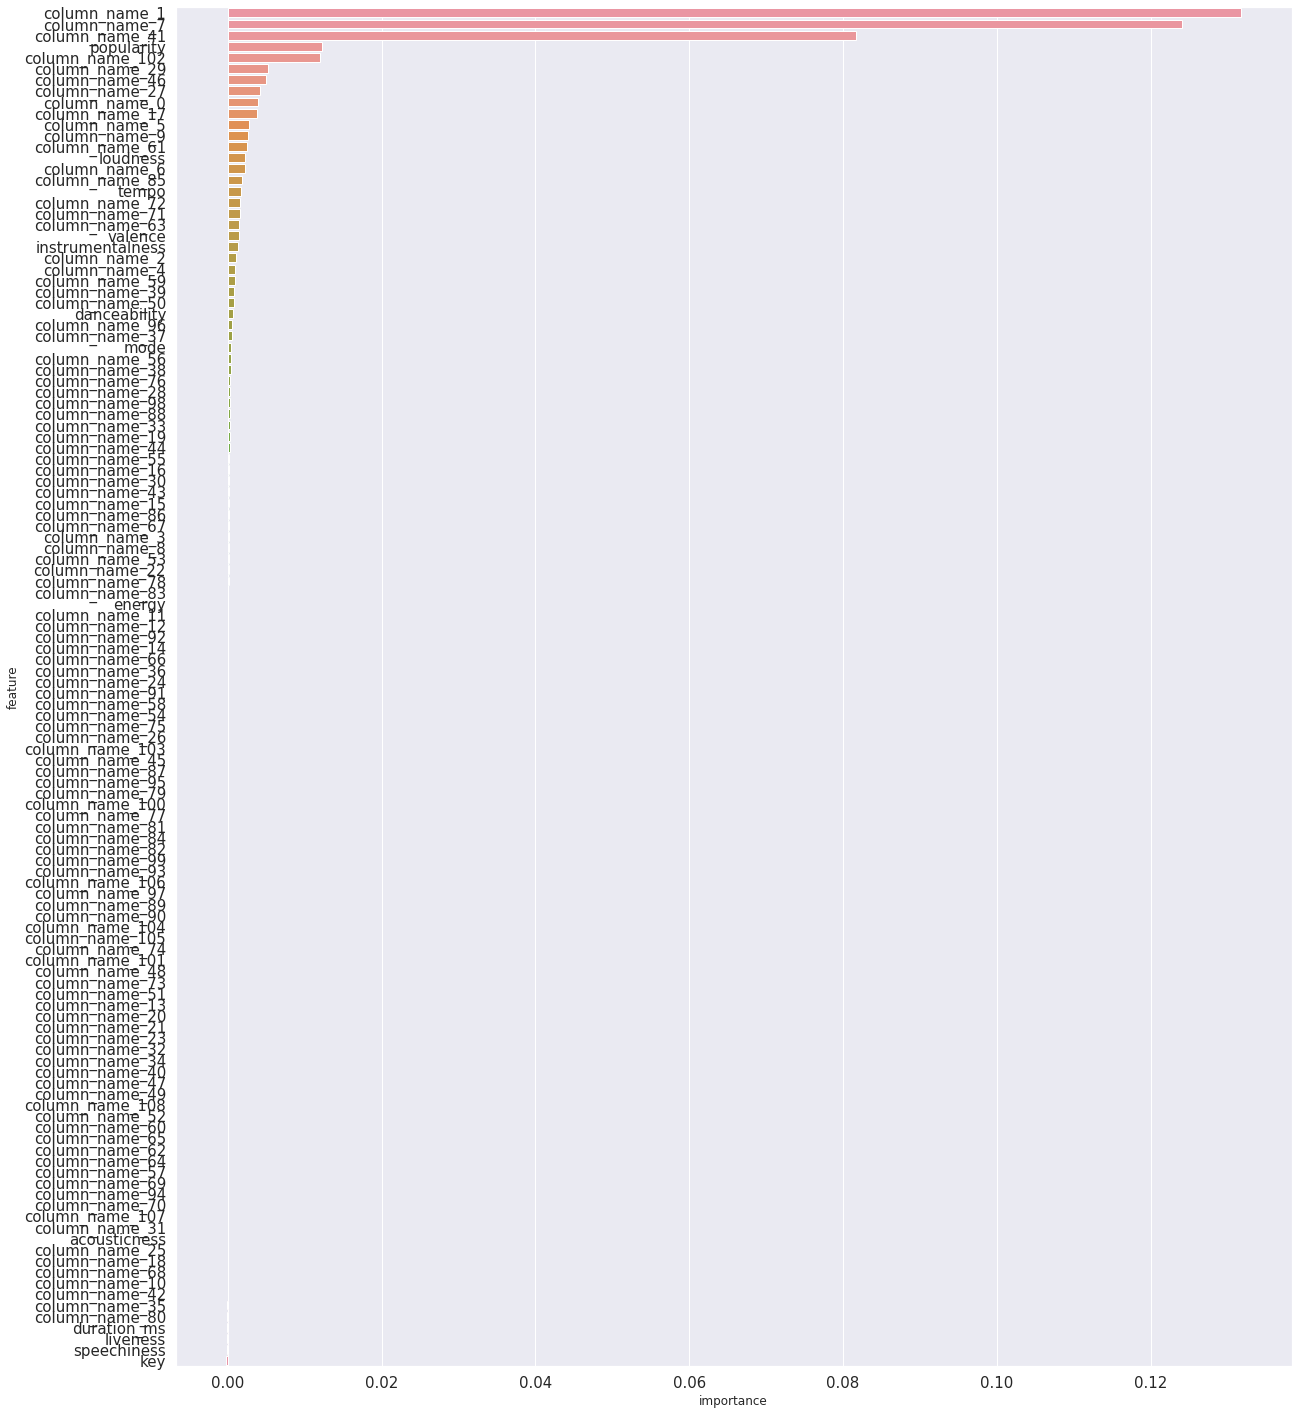

In [203]:
plt.figure(figsize = (20,25))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# We sort by importance and get the features
sns.barplot(x = 'importance', y = 'feature', data = feature_imp, order = feature_imp.sort_values('importance', ascending=False).feature) 